    x         y          Name     size
0   1  1.000000  Sort/1048576  1048576
1   2  1.548562  Sort/1048576  1048576
2   3  1.581632  Sort/1048576  1048576
3   4  1.646780  Sort/1048576  1048576
4   5  1.742254  Sort/1048576  1048576
5   6  1.825500  Sort/1048576  1048576
6   1  1.000000  Sort/3145728  3145728
7   2  2.031855  Sort/3145728  3145728
8   3  2.196108  Sort/3145728  3145728
9   4  2.419375  Sort/3145728  3145728
10  5  2.557332  Sort/3145728  3145728
11  6  2.674032  Sort/3145728  3145728
12  1  1.000000  Sort/5242880  5242880
13  2  1.953060  Sort/5242880  5242880
14  3  1.945022  Sort/5242880  5242880
15  4  2.630511  Sort/5242880  5242880
16  5  2.992396  Sort/5242880  5242880
17  6  3.064376  Sort/5242880  5242880
18  1  1.000000  Sort/7340032  7340032
19  2  1.891706  Sort/7340032  7340032
20  3  2.302988  Sort/7340032  7340032
21  4  2.539327  Sort/7340032  7340032
22  5  2.788451  Sort/7340032  7340032
23  6  2.828883  Sort/7340032  7340032
24  1  1.000000  Sort/943

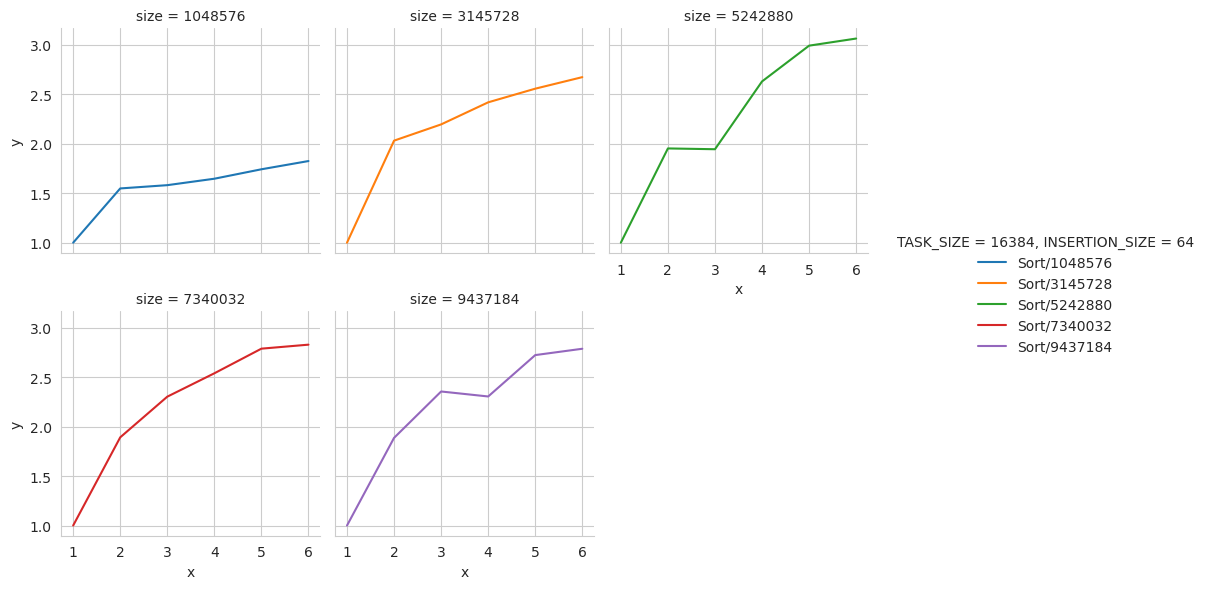

In [59]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_threads = 6
num_rows    = 1

benchmark_start = pd.read_csv("benchmark_start.csv")

benchmark = pd.concat([benchmark_start], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads / num_rows)

titles = []

x = []
y = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads * num_rows].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads * num_rows + 0]

    for j in range(num_threads):
        y    .append(benchmark["real_time"][(i * num_threads + j) * num_rows + 0])

        norm      = y[-1]
        y[-1]     = y_max     / norm

        hue.append(titles[-1])
        size.append(name[2])

        x.append(j + 1)

data = list(zip(x, y, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "Name", "size"])

print(dataFrame)

sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
# g.map(plt.grid)
g.add_legend(title="TASK_SIZE = 16384, INSERTION_SIZE = 64")
g.tight_layout()


    x         y          Name     size
0   1  1.000000  Sort/1048576  1048576
1   2  0.774281  Sort/1048576  1048576
2   3  0.527211  Sort/1048576  1048576
3   4  0.411695  Sort/1048576  1048576
4   5  0.348451  Sort/1048576  1048576
5   6  0.304250  Sort/1048576  1048576
6   1  1.000000  Sort/3145728  3145728
7   2  1.015928  Sort/3145728  3145728
8   3  0.732036  Sort/3145728  3145728
9   4  0.604844  Sort/3145728  3145728
10  5  0.511466  Sort/3145728  3145728
11  6  0.445672  Sort/3145728  3145728
12  1  1.000000  Sort/5242880  5242880
13  2  0.976530  Sort/5242880  5242880
14  3  0.648341  Sort/5242880  5242880
15  4  0.657628  Sort/5242880  5242880
16  5  0.598479  Sort/5242880  5242880
17  6  0.510729  Sort/5242880  5242880
18  1  1.000000  Sort/7340032  7340032
19  2  0.945853  Sort/7340032  7340032
20  3  0.767663  Sort/7340032  7340032
21  4  0.634832  Sort/7340032  7340032
22  5  0.557690  Sort/7340032  7340032
23  6  0.471480  Sort/7340032  7340032
24  1  1.000000  Sort/943

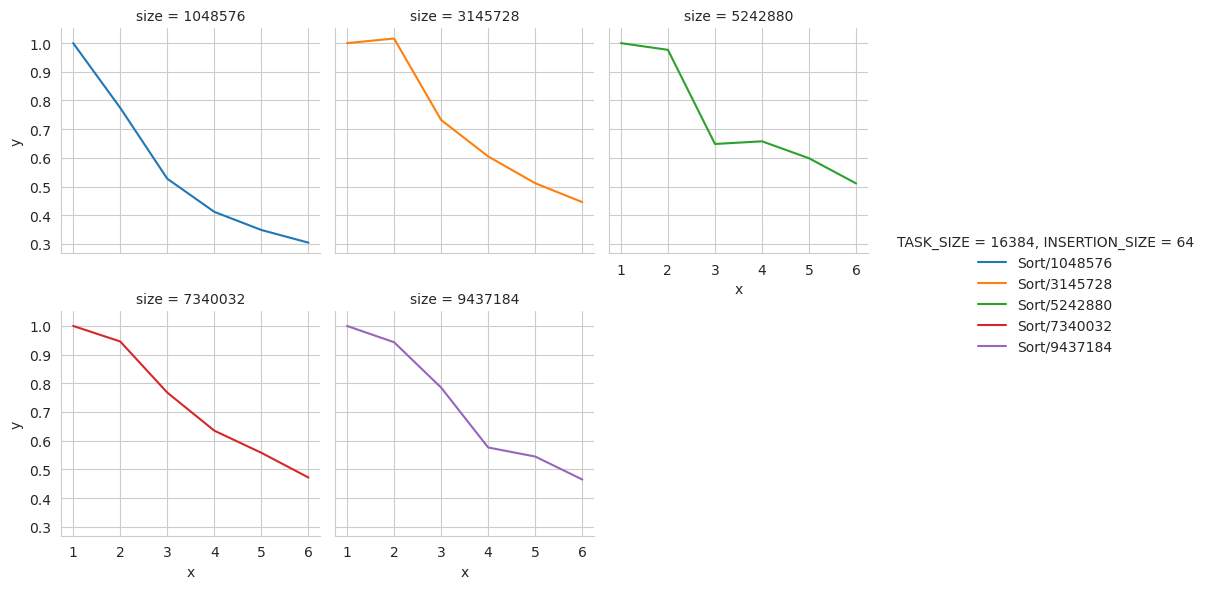

In [58]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_threads = 6
num_rows    = 1

benchmark_start = pd.read_csv("benchmark_start.csv")

benchmark = pd.concat([benchmark_start], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads / num_rows)

titles = []

x = []
y = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads * num_rows].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads * num_rows + 0]

    for j in range(num_threads):
        y    .append(benchmark["real_time"][(i * num_threads + j) * num_rows + 0])

        norm      = y[-1]
        y[-1]     = y_max / norm

        hue.append(titles[-1])
        size.append(name[2])

        x.append(j + 1)
        y[-1] = y[-1] / x[-1]

data = list(zip(x, y, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "Name", "size"])

print(dataFrame)

sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
# g.map(plt.grid)
g.add_legend(title="TASK_SIZE = 16384, INSERTION_SIZE = 64")
g.tight_layout()


         x        y     y_err
0       64  609.923  55.28060
1      128  545.399  16.99610
2      256  527.911   7.46756
3      512  553.965  22.38020
4     1024  533.018   9.21348
5     2048  520.454  18.89870
6     4096  529.556  10.21130
7     8192  539.750  10.70570
8    16384  531.448  16.05650
9    32768  531.030  15.66800
10   65536  528.058  13.73550
11  131072  536.065  15.43930
12  262144  537.662  16.44830


Text(0.5, 1.0, 'threads: 6, size: 10 * 2^20, insertion_size: 64')

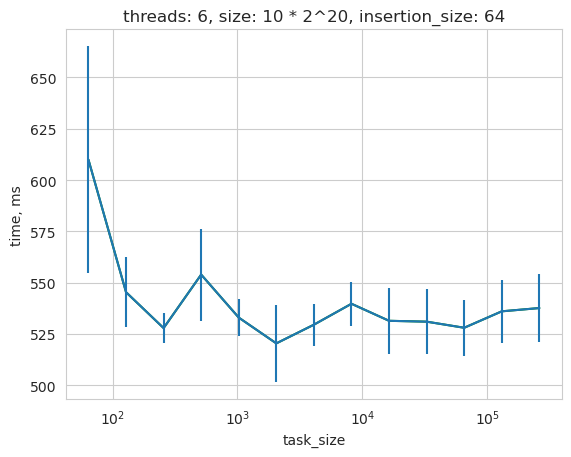

In [45]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_rows = 4

benchmark_task_size = pd.read_csv("benchmark_task_size.csv")
benchmark = pd.concat([benchmark_task_size], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads / num_rows)

titles = []

x = []
y = []
y_err = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads * num_rows].split("/")

    y    .append(benchmark["real_time"][i * num_rows + 0])
    y_err.append(benchmark["real_time"][i * num_rows + 2])
    x    .append(int(name[3]))


data = list(zip(x, y, y_err))
dataFrame = pd.DataFrame(data, columns=["x", "y", "y_err"])

print(dataFrame)


sns.color_palette("tab10")
sns.set_style("whitegrid")
sns.lineplot(data=dataFrame, x="x", y="y", color='green')
plt.xlabel("task_size")
plt.ylabel("time, ms")
plt.errorbar(x, y, y_err)
plt.xscale('log')
plt.title("threads: 6, size: 10 * 2^20, insertion_size: 64")



      x         y     y_err
0     2   707.374  13.44990
1     4   697.366  63.76050
2     8   620.663   6.77301
3    16   584.408  14.54740
4    32   539.022  10.64350
5    64   528.508  18.05780
6   128   540.732  17.00930
7   256   609.317  11.21610
8   512   766.362  31.99880
9  1024  1088.470  44.09080


Text(0.5, 1.0, 'threads: 6, size: 10 * 2^20, taks_size: 2048')

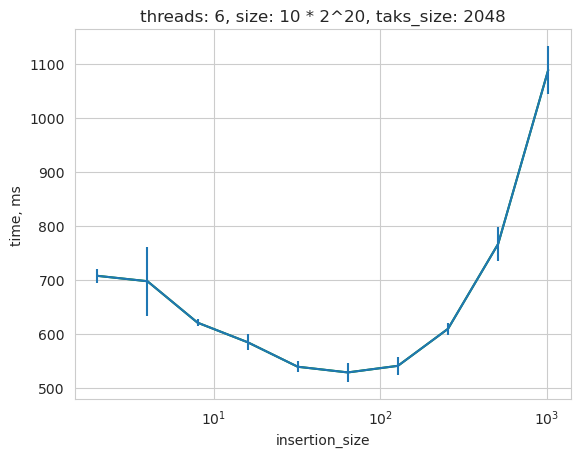

In [63]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_threads = 1
num_rows = 4

benchmark_insertion_size = pd.read_csv("benchmark_insertion_size1.csv")
benchmark = pd.concat([benchmark_insertion_size], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads / num_rows)

titles = []

x = []
y = []
y_err = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads * num_rows].split("/")

    y    .append(benchmark["real_time"][i * num_rows + 0])
    y_err.append(benchmark["real_time"][i * num_rows + 2])
    x    .append(int(name[3]))


data = list(zip(x, y, y_err))
dataFrame = pd.DataFrame(data, columns=["x", "y", "y_err"])

print(dataFrame)


sns.color_palette("tab10")
sns.set_style("whitegrid")
sns.lineplot(data=dataFrame, x="x", y="y", color='green')
plt.xlabel("insertion_size")
plt.ylabel("time, ms")
plt.errorbar(x, y, y_err)
plt.xscale('log')
plt.title("threads: 6, size: 10 * 2^20, taks_size: 2048")



     x         y     y_err          Name     size
0    1  1.000000  0.027338  Sort/1048576  1048576
1    2  1.660162  0.005073  Sort/1048576  1048576
2    3  1.678148  0.027279  Sort/1048576  1048576
3    4  1.852064  0.033700  Sort/1048576  1048576
4    5  2.169398  0.074993  Sort/1048576  1048576
..  ..       ...       ...           ...      ...
85  14  4.872013  0.019085  Sort/9437184  9437184
86  15  4.966218  0.015910  Sort/9437184  9437184
87  16  4.968753  0.012741  Sort/9437184  9437184
88  17  5.107726  0.017332  Sort/9437184  9437184
89  18  5.012860  0.030530  Sort/9437184  9437184

[90 rows x 5 columns]


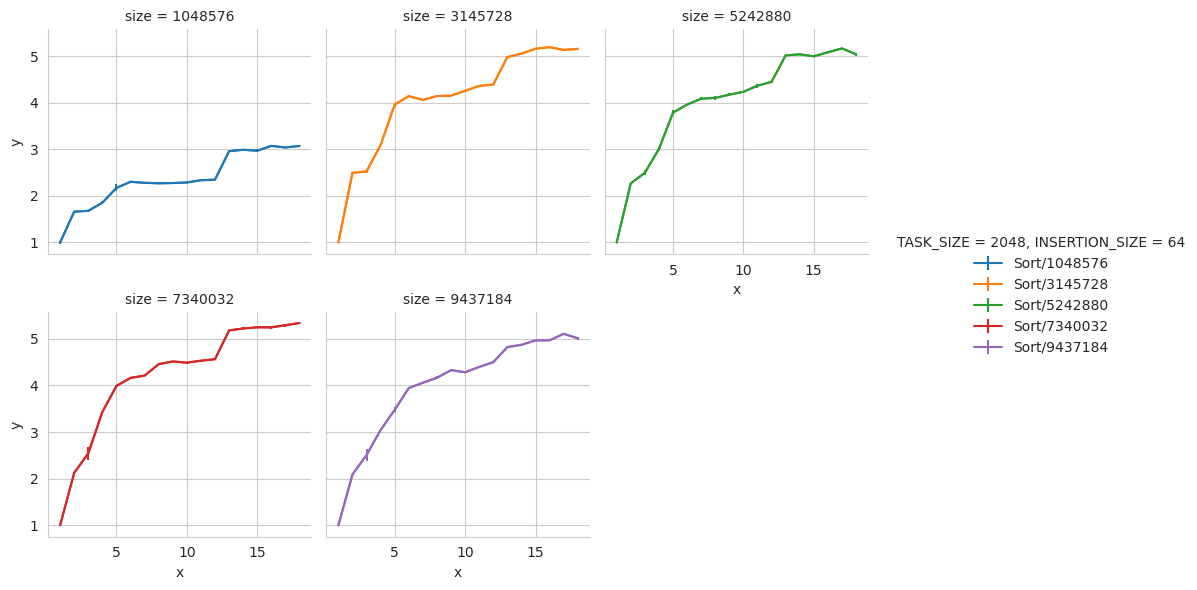

In [56]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_threads = 18
num_rows    = 4

benchmark_end = pd.read_csv("benchmark_end.csv")

benchmark = pd.concat([benchmark_end], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads / num_rows)

titles = []

x = []
y = []
y_err = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads * num_rows].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads * num_rows + 0]

    for j in range(num_threads):
        y    .append(benchmark["real_time"][(i * num_threads + j) * num_rows + 0])
        y_err.append(benchmark["real_time"][(i * num_threads + j) * num_rows + 2])

        norm      = y[-1]
        y[-1]     = y_max     / norm
        y_err[-1] = y_err[-1] / norm

        hue.append(titles[-1])
        size.append(name[2])

        x.append(j + 1)

data = list(zip(x, y, y_err, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "y_err", "Name", "size"])

print(dataFrame)

sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
g.map(plt.errorbar, "x", "y", "y_err");
# g.map(plt.grid)
g.add_legend(title="TASK_SIZE = 2048, INSERTION_SIZE = 64")
g.tight_layout()



     x         y     y_err          Name     size
0    1  1.000000  0.027338  Sort/1048576  1048576
1    2  0.830081  0.002536  Sort/1048576  1048576
2    3  0.559383  0.009093  Sort/1048576  1048576
3    4  0.463016  0.008425  Sort/1048576  1048576
4    5  0.433880  0.014999  Sort/1048576  1048576
..  ..       ...       ...           ...      ...
85  14  0.348001  0.001363  Sort/9437184  9437184
86  15  0.331081  0.001061  Sort/9437184  9437184
87  16  0.310547  0.000796  Sort/9437184  9437184
88  17  0.300454  0.001020  Sort/9437184  9437184
89  18  0.278492  0.001696  Sort/9437184  9437184

[90 rows x 5 columns]


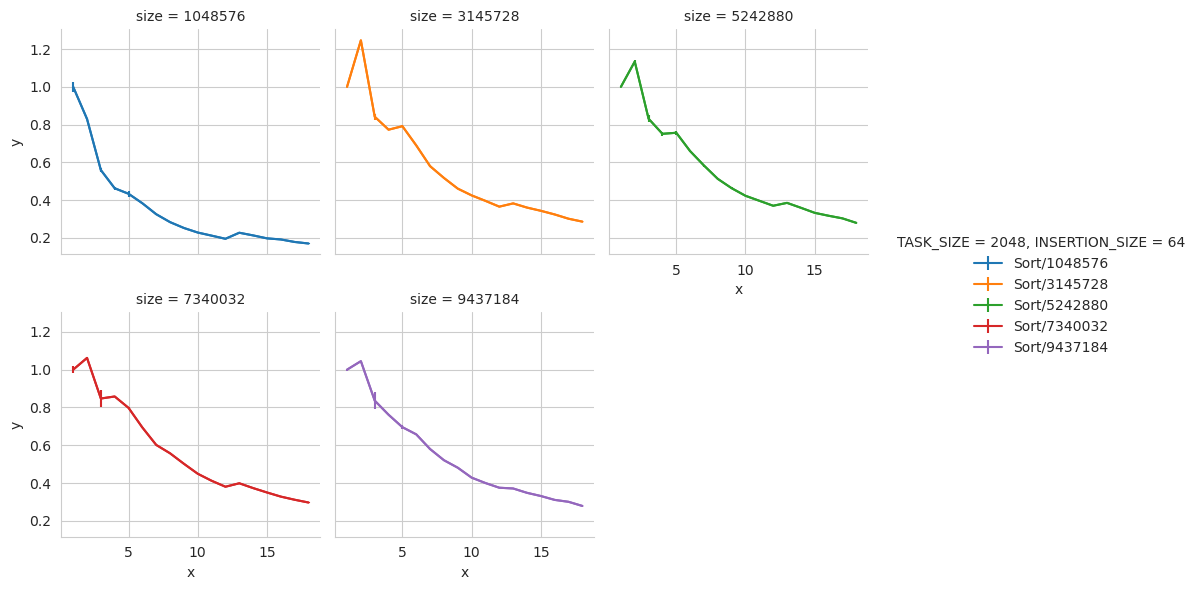

In [57]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

num_threads = 18
num_rows    = 4

benchmark_end = pd.read_csv("benchmark_end.csv")

benchmark = pd.concat([benchmark_end], ignore_index=True)

num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads / num_rows)

titles = []

x = []
y = []
y_err = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads * num_rows].split("/")

    titles.append(name[0] + '/' + name[2])

    y_max = benchmark["real_time"][i * num_threads * num_rows + 0]

    for j in range(num_threads):
        y    .append(benchmark["real_time"][(i * num_threads + j) * num_rows + 0])
        y_err.append(benchmark["real_time"][(i * num_threads + j) * num_rows + 2])

        norm      = y[-1]
        y[-1]     = y_max     / norm
        y_err[-1] = y_err[-1] / norm

        hue.append(titles[-1])
        size.append(name[2])

        x.append(j + 1)

        y[-1] = y[-1] / x[-1]
        y_err[-1] = y_err[-1] / x[-1]


data = list(zip(x, y, y_err, hue, size))
dataFrame = pd.DataFrame(data, columns=["x", "y", "y_err", "Name", "size"])

print(dataFrame)

sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, col="size", col_wrap=3, hue="Name")
g.map(sns.lineplot, "x", "y")
g.map(plt.errorbar, "x", "y", "y_err");
# g.map(plt.grid)
g.add_legend(title="TASK_SIZE = 2048, INSERTION_SIZE = 64")
g.tight_layout()
